In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
cd meas_30sek

/home/krys/POLIBUDA/PomiarTemperaturyBarwowej/Measurements/meas_30sek


In [3]:
ls

Bellight_4W_3000K.npy    Philips_3_5W_2700K.npy
Bellight_6W_4000K.npy    Philips_4_6W_4000K.npy
Bellight_6W_6500K.npy    Swiatlo_dzienne_Niemcewicza_wieczor.npy
Halogen_35W.npy          Untable_Unknown_ALittleWarm.npy
KingFisher_3W_2700K.npy


In [4]:
all_meas = []

dzienne = np.load("Swiatlo_dzienne_Niemcewicza_wieczor.npy")
P_2700K = np.load("Philips_3_5W_2700K.npy")
P_4000K = np.load("Philips_4_6W_4000K.npy")
B_3000K = np.load("Bellight_4W_3000K.npy")
B_4000K = np.load("Bellight_6W_4000K.npy")
B_6500K = np.load("Bellight_6W_6500K.npy")
K_2700K = np.load("KingFisher_3W_2700K.npy")
Halogen = np.load("Halogen_35W.npy")

all_meas.append(dzienne)
all_meas.append(P_2700K)
all_meas.append(P_4000K)
all_meas.append(B_3000K)
all_meas.append(B_4000K)
all_meas.append(B_6500K)
all_meas.append(K_2700K)
all_meas.append(Halogen)

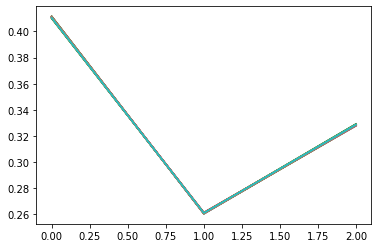

In [18]:
def normalize(rgb_t):
    rgb_t_np = np.asarray(rgb_t)
    return rgb_t_np/sum(rgb_t_np)

def invertData(rgb_t):
    inv_rgb_t = 1/rgb_t
    return normalize(inv_rgb_t)

def plotErr(numpy_RGB_raw):
    for i in range(len(numpy_RGB_raw)):
        plt.plot(invertData(numpy_RGB_raw[i]))
    
plotErr(dzienne)

Wnioski:

Dla stabilnego źródła ilość pomiarów nie wpływa znacząco na wynik. Mierzone okresy delikatnie się zwiększają wraz z upływem czasu, ich stosunek pozostaje niezmienny. 

Możliwe, że koniecznym będzie sprawdzanie stabilności źródła poprzez badanie zmiany stosunku na przestrzeni kilku pomiarów. 

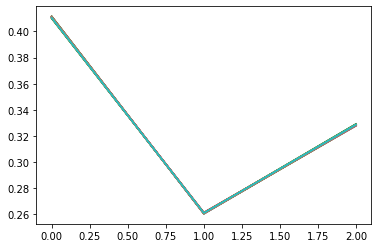

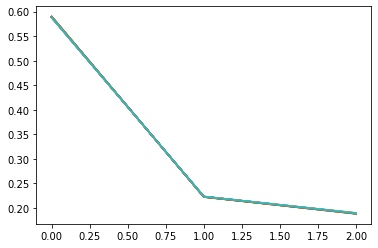

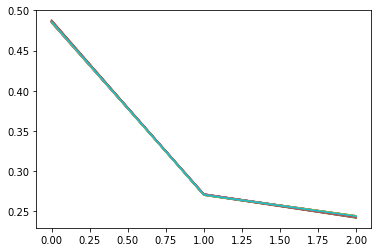

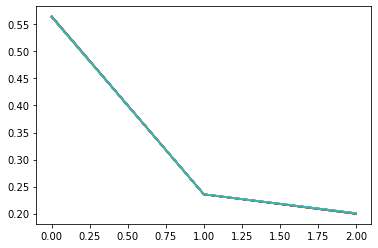

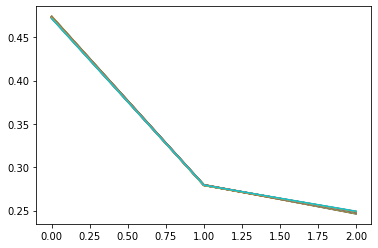

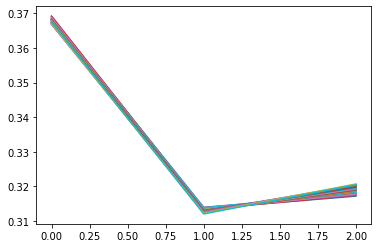

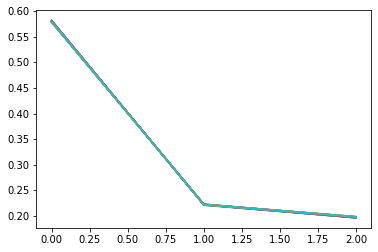

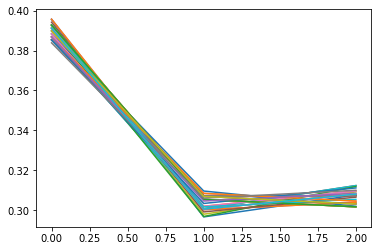

In [11]:
for i in range(len(all_meas)):
    plt.figure(i)
    plotErr(all_meas[i])

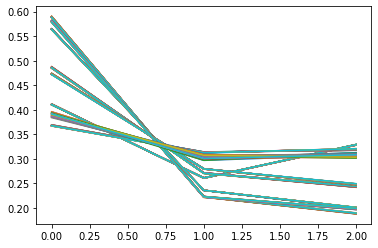

In [12]:
plt.figure(1)
for i in range(len(all_meas)):
    plotErr(all_meas[i])

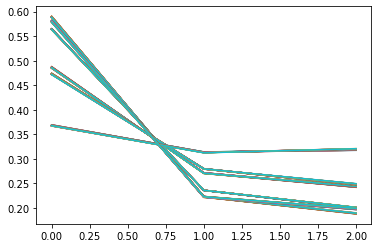

In [13]:
plt.figure(1)
for i in range(1,len(all_meas)-1):
    plotErr(all_meas[i])

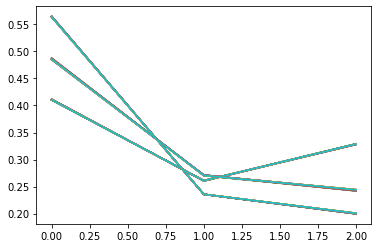

In [18]:
plt.figure(1)
plotErr(all_meas[0])
plotErr(all_meas[2])
plotErr(all_meas[3])

In [21]:
all_meas_Inv_Norm = []
for meas in all_meas:
    meas_Inv_Norm = []
    for current_meas in meas:
        meas_Inv_Norm.append(invertData(current_meas))
    all_meas_Inv_Norm.append(meas_Inv_Norm)
    
all_meas[1][1]
all_meas_Inv_Norm[1][1]

array([0.59063503, 0.2217153 , 0.18764967])

[array([0.5888908 , 0.22250966, 0.18859955]), array([0.48596954, 0.27077474, 0.24325572]), array([0.36786877, 0.31303272, 0.31909851])]
[  -160.49142328 -27652.44976015  47385.51345173]


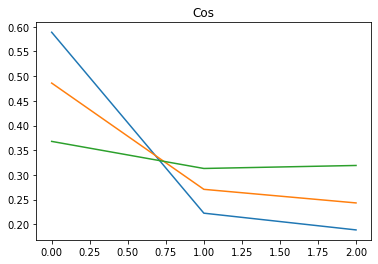

In [45]:
from numpy.linalg import solve

macierzeWsp = []

for i in range(len(P_2700K)):
    macierz = [all_meas_Inv_Norm[1][i], all_meas_Inv_Norm[2][i], all_meas_Inv_Norm[5][i]]
    macierzN = np.asarray(macierz)
    wsp = solve(macierzN, [2700, 4000, 6500])
    #print(wsp)
    macierzeWsp.append(wsp)


av_2700K = sum(all_meas_Inv_Norm[1])/len(all_meas_Inv_Norm[1])
av_4000K = sum(all_meas_Inv_Norm[2])/len(all_meas_Inv_Norm[2])
av_6500K = sum(all_meas_Inv_Norm[5])/len(all_meas_Inv_Norm[5])

av_macierz = [av_2700K, av_4000K, av_6500K]

print(av_macierz)
plt.plot(av_2700K)
plt.plot(av_4000K)
plt.plot(av_6500K)

av_macierzN = np.asarray(av_macierz)
av_wsp = solve(macierzN, [2700, 4000, 6500])
print(av_wsp)

In [36]:
def colorTempEstimation3(RGB_meas, wsp):
    estym = ((wsp[0]*RGB_meas[0])+(wsp[1]*RGB_meas[1])+(wsp[2]*RGB_meas[2]))
    return round(estym)

War_Tab = []
for i in range(1,len(all_meas_Inv_Norm)-1):
    CT_tab = []
    
    for current in all_meas_Inv_Norm[i]:
        CT_tab.append(colorTempEstimation3(current, av_wsp))
        
    War_Tab.append(CT_tab)



In [39]:
np.save("ModelParams", wsp)